# Forensic POS Data Analysis

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

### Backgound & Objective
In 2006, a group of Americans invested in a company that claimed it went out of buisness shortly after receiving funds from the group.  This company sold and serviced point-of-sales (POS) equipment such as credit and debit card processing machines to small and medium sized merchants throughout Canada.  The information the Americans collected as a part of their due diligence suggested that the company they had invested in had substantial assets and cashflow, but that the president of the company was attempting to avoid paying back the investors in spite of having the means to do so.

In 2007, the Americans obtained a [judgment against the company](https://github.com/MichaelSzczepaniak/FraudulentConveyance/blob/master/Judgment%20%28redacted%29.pdf) and conducted a [judgment debtor examination (JDE)](https://www.attorneygeneral.jus.gov.on.ca/english/courts/guides/After_Judgement_Guide_to_Getting_Results_EN.html#_Toc436642217) with the president.  One of the undertakings from the JDE was for the president of the company to provide data showing the monthly account activity for all the merchants and terminals the company had in its portfolio over a given time period.

The purpose of this analysis was to investigate the likelihood that [fraudulant conveyance](https://en.wikipedia.org/wiki/Fraudulent_conveyance) had occurred.  This was originally done in Java.  The data being analyzed in this notebook was taken from the actual legal action that spanned from 2007 through 2013 utilizing a port of the original Java code over to Python.

### Data
The data was originally provided as a collection of Microsoft Word files which were converted to and saved as straight ASCII text files to simplify the analysis.  Each of these data files can be found [here](https://github.com/MichaelSzczepaniak/FraudulentConveyance/tree/master/data/rawOsMerchantReportsTxt).  These text files are considered the raw data from which the [preprocessing](https://www.techopedia.com/definition/14650/data-preprocessing) and the subsequent analysis was conducted.

### Preprocessing
As with most data analysis projects, most of the work involved preprocessing the data to get it into a usable form.  Preprocessing roughly followed these steps:
1. stuff
2. more stuff
3. more stuff

(0, 0.2)

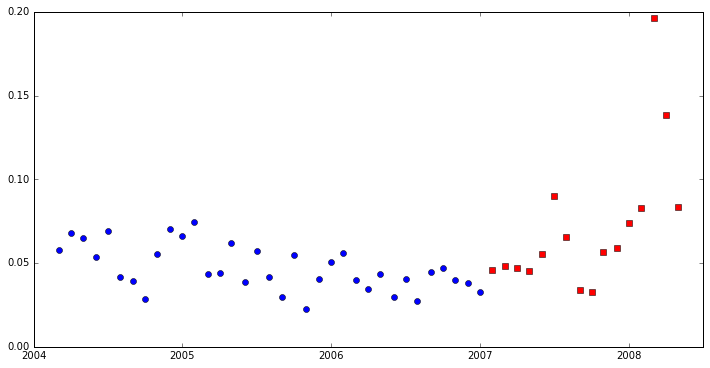

In [19]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
width=12; height=6
plt.figure(figsize=(width, height))  # http://stackoverflow.com/questions/29589119/
plt.xticks(np.arange(2003, 2008.5, 1.0))  # http://stackoverflow.com/questions/12608788/
ax = plt.gca()
x_formatter = mp.ticker.ScalarFormatter(useOffset=False)
ax.xaxis.set_major_formatter(x_formatter)

data = pd.read_csv("../data/OsMerchantTerminalDropsAdds.csv")
d1 = data.loc[1:35]
d2 = data.loc[36:]
plt.plot(d1['yearFrac'], d1['merchant_drop_rate'], 'bo')
plt.plot(d2['yearFrac'], d2['merchant_drop_rate'], 'rs')
plt.xlim([2004,2008.5])
plt.ylim([0, 0.2])

As has been derived in countless textbooks, the linear least squares equation for $\wv$ can be written in matrix form as

$\Xv^T \Xv \wv = \Xv^T \Tv$

There are several ways to solve for $\wv$, but I'll use the *lstsq* function because it does not assume linearly independent matrix columns. 

    w = np.linalg.lstsq(np.dot(X.T,X), np.dot(X.T, T))

In [21]:
# h(orizontal )stack(ing): like cbind in r...
X1 = np.hstack((np.ones((d1['yearFrac'].shape[0],1)), X))
xtx = np.dot(X1.T, d1['yearFrac'])
xtx
#w1 = np.linalg.lstsq(np.dot(d1['yearFrac'].T, d1['yearFrac']),
#                     np.dot(d1['yearFrac'].T, d1['merchant_drop_rate']))
#w1

140782795.90220001